Problem statement

Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

Help save them and change history!

Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read files

In [3]:
train = pd.read_csv("/train.csv")
test = pd.read_csv("/test.csv")
submission = pd.read_csv("/sample_submission.csv")

In [4]:
train

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [6]:
submission

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


Analyse train

In [7]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
train1 = train.dropna()
train1

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


Analyse target

In [9]:
train1['Transported'].replace({False: 0, True: 1},inplace=True)
train1['Transported']

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 6606, dtype: int64

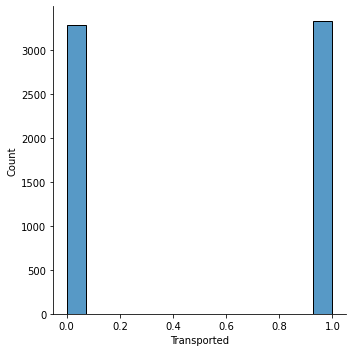

In [10]:
sns.displot(train1['Transported'])

In [11]:
trans_count = train1['Transported'].value_counts()
trans_count

1    3327
0    3279
Name: Transported, dtype: int64

In [12]:
trans_percent = trans_count / len(train1)
trans_percent

1    0.503633
0    0.496367
Name: Transported, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


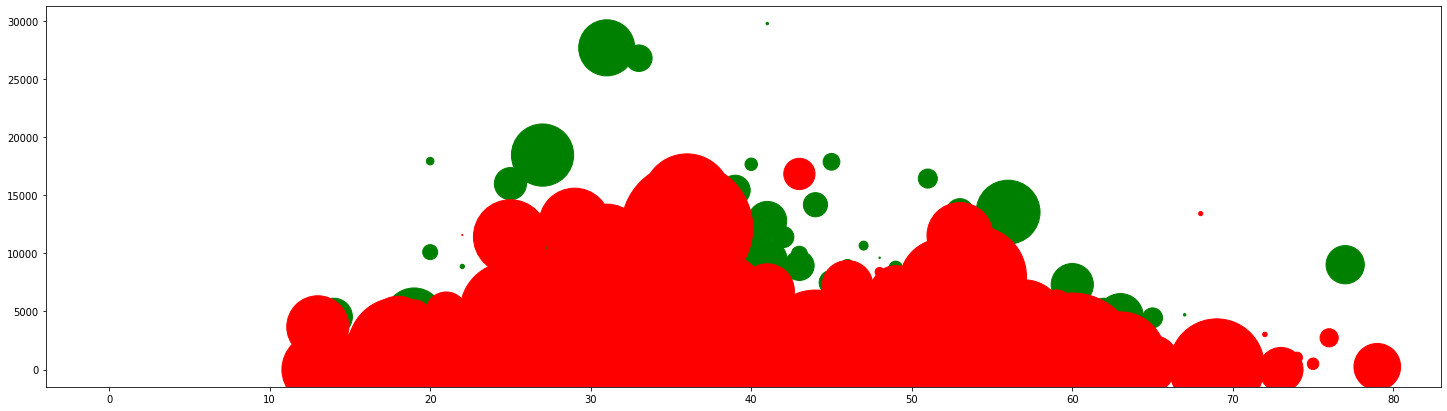

In [13]:
plt.figure(figsize=(25, 7))
ax = plt.subplot()
ax.scatter(train1[train1['Transported'] == 1]['Age'], train1[train['Transported'] == 1]['FoodCourt'], c='green', s=train1[train1['Transported'] == 1]['VRDeck'])
ax.scatter(train1[train1['Transported'] == 0]['Age'], train1[train['Transported'] == 0]['FoodCourt'], c='red', s=train1[train1['Transported'] == 0]['VRDeck']);


Drop target

In [14]:
target = train1['Transported']

train1.drop(['Transported'],axis=1, inplace=True)
train1

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre


Combine train and test

In [15]:
combi = train1.append(test)
combi

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


Analyse combi

In [16]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   10883 non-null  object 
 1   HomePlanet    10796 non-null  object 
 2   CryoSleep     10790 non-null  object 
 3   Cabin         10783 non-null  object 
 4   Destination   10791 non-null  object 
 5   Age           10792 non-null  float64
 6   VIP           10790 non-null  object 
 7   RoomService   10801 non-null  float64
 8   FoodCourt     10777 non-null  float64
 9   ShoppingMall  10785 non-null  float64
 10  Spa           10782 non-null  float64
 11  VRDeck        10803 non-null  float64
 12  Name          10789 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.2+ MB


In [17]:
combi.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,10792.000000,10801.000000,10777.000000,10785.000000,10782.000000,10803.000000
mean,28.802539,221.544764,463.680894,177.945387,309.246151,306.472369
std,14.396816,630.484127,1621.887223,570.343750,1133.658617,1175.106100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,51.000000,81.000000,31.000000,59.000000,44.000000
max,79.000000,11567.000000,29813.000000,12253.000000,22408.000000,22272.000000


Check for null values

In [18]:
combi.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

Impute null values

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(random_state=42)

date = pd.Timestamp('2200-01-01')

for col in combi:
    if combi[col].dtype=="object":
        combi[col].fillna("not listed", inplace=True)
    if combi[col].dtype=="int":
        #X[col].fillna(X[col].mode()[0], inplace=True)
        combi[col].fillna(combi[col].mean(), inplace=True)
        #combi[col] = combi[col].astype.int()
    if combi[col].dtype=='float':
       #X[col].fillna(X[col].mean(), inplace=True)
       combi[col] = imp.fit_transform(combi[col].values.reshape(-1,1))
    if combi[col].dtype=="datetime64[ns]":
        combi[col].fillna(date, inplace=True)
combi

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.000000,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.000000,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.000000,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.000000,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.000000,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,not listed,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.802539,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,not listed,28.802539,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [20]:
combi.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

Analyse features

Home Planet

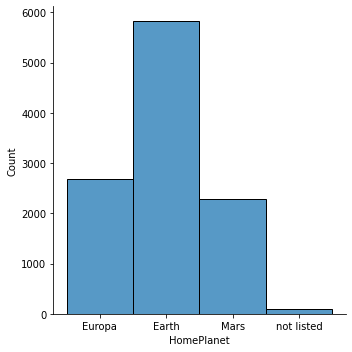

In [21]:
sns.displot(combi['HomePlanet'])

In [22]:
home_count = combi['HomePlanet'].value_counts()
home_count

Earth         5829
Europa        2675
Mars          2292
not listed      87
Name: HomePlanet, dtype: int64

In [23]:
home_percent = home_count / len(combi)
home_percent

Earth         0.535606
Europa        0.245796
Mars          0.210604
not listed    0.007994
Name: HomePlanet, dtype: float64

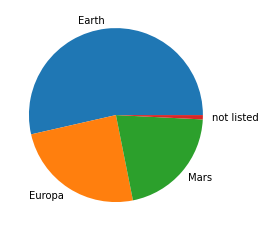

In [24]:
mylabels = ["Earth", "Europa", "Mars", "not listed"]
plt.pie(home_percent, labels=mylabels)
plt.show() 

In [25]:
combi['HomePlanet'].replace({"Earth": 1, "Europa": 2, "Mars": 3, "not listed": 4},inplace=True)
combi['HomePlanet']

0       2
1       1
2       2
3       2
4       1
       ..
4272    1
4273    1
4274    3
4275    2
4276    1
Name: HomePlanet, Length: 10883, dtype: int64

Cryo Sleep

In [26]:
combi['CryoSleep'][combi['CryoSleep'] == 'not listed'] = False

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
print(combi.iloc[6674])

PassengerId         0156_01
HomePlanet                3
CryoSleep             False
Cabin                F/34/P
Destination     TRAPPIST-1e
Age               28.802539
VIP                   False
RoomService             0.0
FoodCourt               0.0
ShoppingMall            0.0
Spa                     0.0
VRDeck                  0.0
Name            Tures Upead
Name: 68, dtype: object


In [28]:
combi['CryoSleep'].replace({False: 0, True: 1})

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CryoSleep', ylabel='Density'>

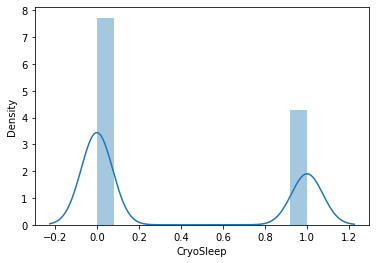

In [29]:
sns.distplot(combi['CryoSleep'])

In [30]:
sleep_count = combi['CryoSleep'].value_counts()
sleep_count

False    7007
True     3876
Name: CryoSleep, dtype: int64

In [31]:
sleep_percent = sleep_count / len(combi)
sleep_percent

False    0.643848
True     0.356152
Name: CryoSleep, dtype: float64

In [32]:
combi['CryoSleep'] = combi['CryoSleep'].astype(int)
combi['CryoSleep']

0       0
1       0
2       0
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 10883, dtype: int64

Destination

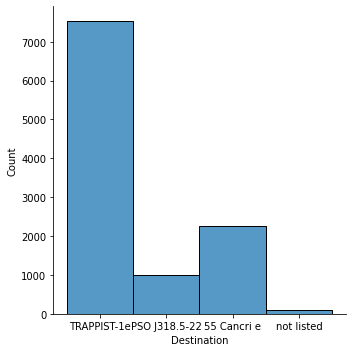

In [33]:
sns.displot(combi['Destination'])

In [34]:
dest_count = combi['Destination'].value_counts()
dest_count

TRAPPIST-1e      7532
55 Cancri e      2248
PSO J318.5-22    1011
not listed         92
Name: Destination, dtype: int64

In [35]:
dest_percent = dest_count / len(combi)
dest_percent

TRAPPIST-1e      0.692089
55 Cancri e      0.206561
PSO J318.5-22    0.092897
not listed       0.008454
Name: Destination, dtype: float64

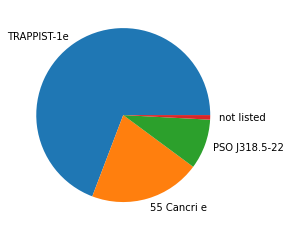

In [36]:
mylabels = ["TRAPPIST-1e", "55 Cancri e", "PSO J318.5-22", "not listed"]
plt.pie(dest_percent, labels=mylabels)
plt.show() 

In [37]:
combi['Destination'].replace({"TRAPPIST-1e": 1, "55 Cancri e": 2, "PSO J318.5-22": 3, "not listed": 4},inplace=True)
combi['Destination']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    2
4275    4
4276    3
Name: Destination, Length: 10883, dtype: int64

Age

In [38]:
combi['Age_group'] = pd.cut(x=combi['Age'], bins=[-1, 18, 40, 65, 100], labels=['child', 'young adult', 'middle age', 'pensioner'])
combi['Age_group']

0       young adult
1       young adult
2        middle age
3       young adult
4             child
           ...     
4272    young adult
4273     middle age
4274    young adult
4275    young adult
4276     middle age
Name: Age_group, Length: 10883, dtype: category
Categories (4, object): ['child' < 'young adult' < 'middle age' < 'pensioner']

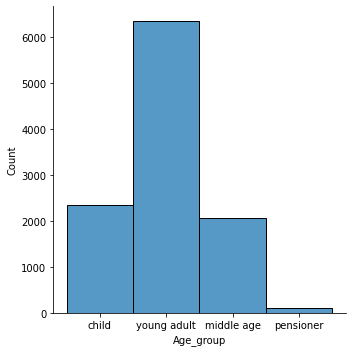

In [39]:
sns.displot(combi['Age_group'])

In [40]:
age_count = combi['Age_group'].value_counts()
age_count

young adult    6359
child          2340
middle age     2074
pensioner       110
Name: Age_group, dtype: int64

In [41]:
age_percent = age_count / len(combi)
age_percent

young adult    0.584306
child          0.215014
middle age     0.190572
pensioner      0.010108
Name: Age_group, dtype: float64

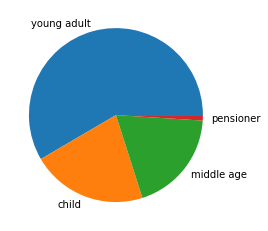

In [42]:
mylabels = ["young adult", "child", "middle age", "pensioner"]
plt.pie(age_percent, labels=mylabels)
plt.show() 

In [43]:
combi['Age_group'].replace({"young adult": 1, "child": 2, "middle age": 3, "pensioner": 4},inplace=True)
combi['Age_group']

0       1
1       1
2       3
3       1
4       2
       ..
4272    1
4273    3
4274    1
4275    1
4276    3
Name: Age_group, Length: 10883, dtype: int64

In [44]:
combi['Age_group'] = combi['Age_group'].astype(int)

VIP

In [45]:
combi['VIP'][combi['VIP'] == 'not listed'] = False

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
combi['VIP'].replace({False: 0, True: 1})

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VIP', ylabel='Density'>

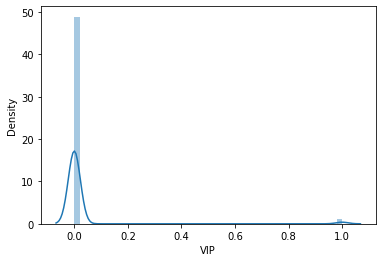

In [47]:
sns.distplot(combi['VIP'])

In [48]:
vip_count = combi['VIP'].value_counts()
vip_count

False    10647
True       236
Name: VIP, dtype: int64

In [49]:
vip_percent = vip_count / len(combi)
vip_percent

False    0.978315
True     0.021685
Name: VIP, dtype: float64

In [50]:
combi['VIP'] = combi['VIP'].astype(int)
combi['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 10883, dtype: int64

Room Service

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RoomService'>

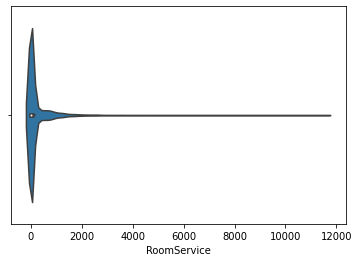

In [51]:
sns.violinplot(combi['RoomService'])

In [52]:
rm_service_high = combi['RoomService'].max()
print(rm_service_high)

11567.0


In [53]:
combi['Room_Service_group'] = pd.cut(x=combi['RoomService'], bins=[-1, 2000, 8000, 12000], labels=['low', 'med', 'high'])
combi['Room_Service_group']


0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Room_Service_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

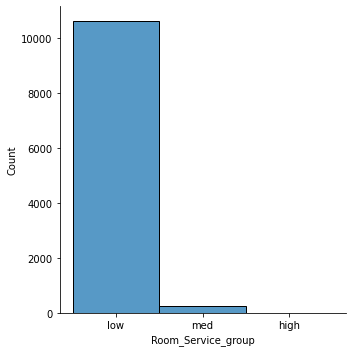

In [54]:
sns.displot(combi['Room_Service_group'])

In [55]:
rm_service_count = combi['Room_Service_group'].value_counts()
rm_service_count

low     10624
med       253
high        6
Name: Room_Service_group, dtype: int64

In [56]:
rm_service_percent = rm_service_count / len(combi)
rm_service_percent

low     0.976201
med     0.023247
high    0.000551
Name: Room_Service_group, dtype: float64

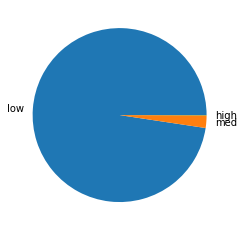

In [57]:
mylabels = ["low", "med", "high"]
plt.pie(rm_service_percent, labels=mylabels)
plt.show()

In [58]:
combi['Room_Service_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Room_Service_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Room_Service_group, Length: 10883, dtype: int64

Food Court

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FoodCourt'>

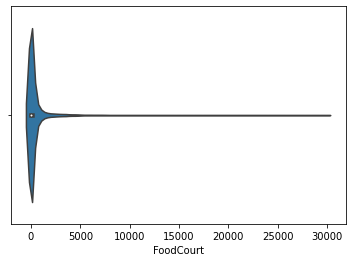

In [59]:
sns.violinplot(combi['FoodCourt'])

In [60]:
food_high = combi['FoodCourt'].max()
print(food_high)

29813.0


In [61]:
combi['Food_Court_group'] = pd.cut(x=combi['FoodCourt'], bins=[-1, 5000, 20000, 30000], labels=['low', 'med', 'high'])
combi['Food_Court_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Food_Court_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

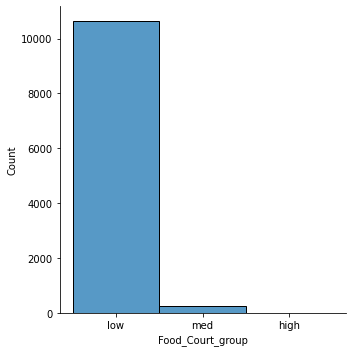

In [62]:
sns.displot(combi['Food_Court_group'])

In [63]:
fd_court_count = combi['Food_Court_group'].value_counts()
fd_court_count

low     10640
med       235
high        8
Name: Food_Court_group, dtype: int64

In [64]:
fd_court_percent = fd_court_count / len(combi)
fd_court_percent

low     0.977672
med     0.021593
high    0.000735
Name: Food_Court_group, dtype: float64

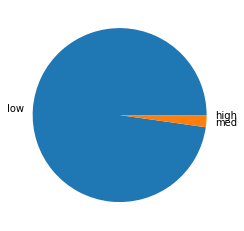

In [65]:
mylabels = ["low", "med", "high"]
plt.pie(fd_court_percent, labels=mylabels)
plt.show()

In [66]:
combi['Food_Court_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Food_Court_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Food_Court_group, Length: 10883, dtype: int64

Shopping Mall

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ShoppingMall'>

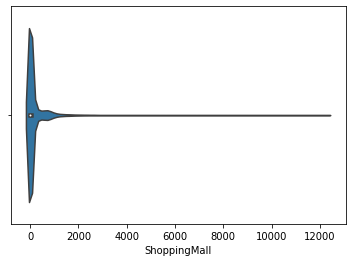

In [67]:
sns.violinplot(combi['ShoppingMall'])

In [68]:
shop_high = combi['ShoppingMall'].max()
print(shop_high)

12253.0


In [69]:
combi['Shopping_group'] = pd.cut(x=combi['ShoppingMall'], bins=[-1, 2000, 8000, 13000], labels=['low', 'med', 'high'])
combi['Shopping_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Shopping_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

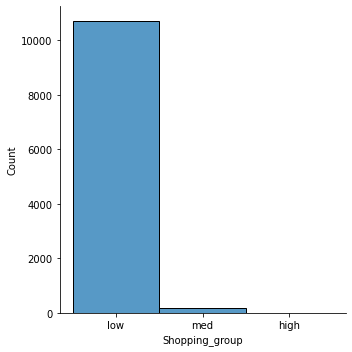

In [70]:
sns.displot(combi['Shopping_group'])

In [71]:
shopping_count = combi['Shopping_group'].value_counts()
shopping_count

low     10709
med       166
high        8
Name: Shopping_group, dtype: int64

In [72]:
shopping_percent = shopping_count / len(combi)
shopping_percent

low     0.984012
med     0.015253
high    0.000735
Name: Shopping_group, dtype: float64

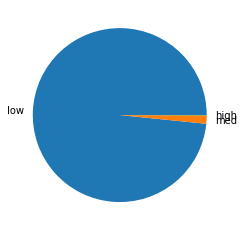

In [73]:
mylabels = ["low", "med", "high"]
plt.pie(shopping_percent, labels=mylabels)
plt.show()

In [74]:
combi['Shopping_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Shopping_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Shopping_group, Length: 10883, dtype: int64

Spa

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Spa'>

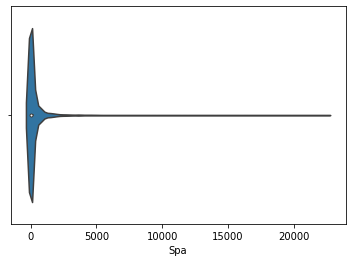

In [75]:
sns.violinplot(combi['Spa'])

In [76]:
spa_high = combi['Spa'].max()
print(spa_high)

22408.0


In [77]:
combi['Spa_group'] = pd.cut(x=combi['Spa'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
combi['Spa_group']

0       low
1       low
2       med
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: Spa_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

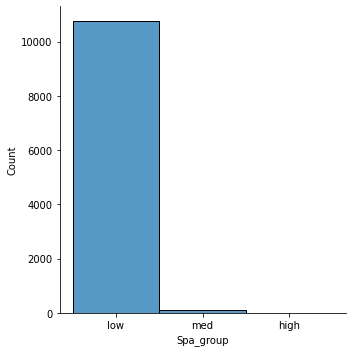

In [78]:
sns.displot(combi['Spa_group'])

In [79]:
spa_count = combi['Spa_group'].value_counts()
spa_count

low     10762
med       112
high        9
Name: Spa_group, dtype: int64

In [80]:
spa_percent = spa_count / len(combi)
spa_percent

low     0.988882
med     0.010291
high    0.000827
Name: Spa_group, dtype: float64

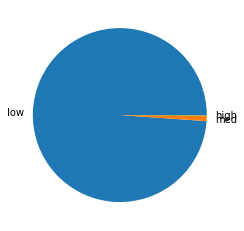

In [81]:
mylabels = ["low", "med", "high"]
plt.pie(spa_percent, labels=mylabels)
plt.show()

In [82]:
combi['Spa_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['Spa_group']

0       1
1       1
2       2
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: Spa_group, Length: 10883, dtype: int64

VR Deck

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='VRDeck'>

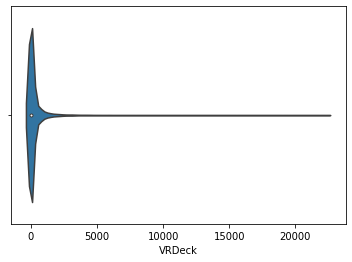

In [83]:
sns.violinplot(combi['VRDeck'])

In [84]:
vr_high = combi['VRDeck'].max()
print(vr_high)

22272.0


In [85]:
combi['VR_group'] = pd.cut(x=combi['VRDeck'], bins=[-1, 5000, 15000, 23000], labels=['low', 'med', 'high'])
combi['VR_group']

0       low
1       low
2       low
3       low
4       low
       ... 
4272    low
4273    low
4274    low
4275    low
4276    low
Name: VR_group, Length: 10883, dtype: category
Categories (3, object): ['low' < 'med' < 'high']

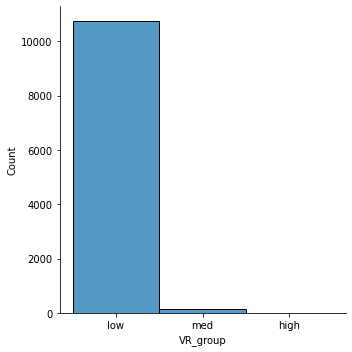

In [86]:
sns.displot(combi['VR_group'])

In [87]:
vr_count = combi['VR_group'].value_counts()
vr_count

low     10746
med       127
high       10
Name: VR_group, dtype: int64

In [88]:
vr_percent = vr_count / len(combi)
vr_percent

low     0.987412
med     0.011670
high    0.000919
Name: VR_group, dtype: float64

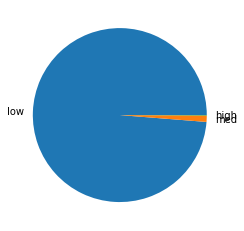

In [89]:
mylabels = ["low", "med", "high"]
plt.pie(vr_percent, labels=mylabels)
plt.show()

In [90]:
combi['VR_group'].replace({"low": 1, "med": 2, "high": 3},inplace=True)
combi['VR_group']

0       1
1       1
2       1
3       1
4       1
       ..
4272    1
4273    1
4274    1
4275    1
4276    1
Name: VR_group, Length: 10883, dtype: int64

Assign features

In [91]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10883 entries, 0 to 4276
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PassengerId         10883 non-null  object 
 1   HomePlanet          10883 non-null  int64  
 2   CryoSleep           10883 non-null  int64  
 3   Cabin               10883 non-null  object 
 4   Destination         10883 non-null  int64  
 5   Age                 10883 non-null  float64
 6   VIP                 10883 non-null  int64  
 7   RoomService         10883 non-null  float64
 8   FoodCourt           10883 non-null  float64
 9   ShoppingMall        10883 non-null  float64
 10  Spa                 10883 non-null  float64
 11  VRDeck              10883 non-null  float64
 12  Name                10883 non-null  object 
 13  Age_group           10883 non-null  int64  
 14  Room_Service_group  10883 non-null  int64  
 15  Food_Court_group    10883 non-null  int64  
 16  Shopp

Define X and y

In [92]:
features = ["HomePlanet", "CryoSleep", "Destination", "Age_group", "Room_Service_group", "Food_Court_group", "Shopping_group", "Spa_group", "VR_group"]

y = target
X = combi[features][: len(train1)]
X_test = combi[features][len(train1) :]

Heatmap

<AxesSubplot:>

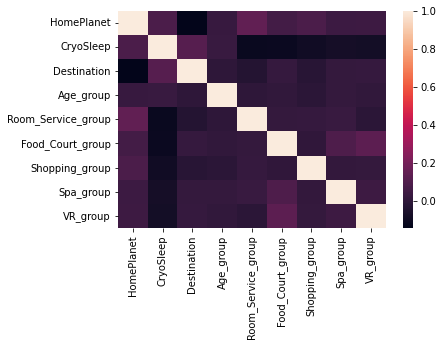

In [93]:
cmap = combi[features].corr()
sns.heatmap(cmap)


Split dataset for training and validating

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10, random_state=1, stratify=y, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((5945, 9), (661, 9), (5945,), (661,), (4277, 9))

Select model

In [95]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42, C=10).fit(X_train, y_train)
print(model.score(X_train, y_train))

0.7391084945332212


Predict validation

In [96]:
y_pred = model.predict(X_val)
print(model.score(X_val, y_val))

0.7443267776096822


Confusion matrix

In [97]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_val, y_pred))

[[292  36]
 [133 200]]


Predict on X_test

In [98]:
predictions = model.predict(X_test)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')
predictions

array(['True', 'False', 'True', ..., 'True', 'False', 'True'], dtype='<U5')

Prepare and submit

In [99]:
submission['Transported'] = predictions
submission.to_csv('submission.csv', index=False)
my_submission = pd.read_csv("submission.csv")
my_submission

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
